In [69]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


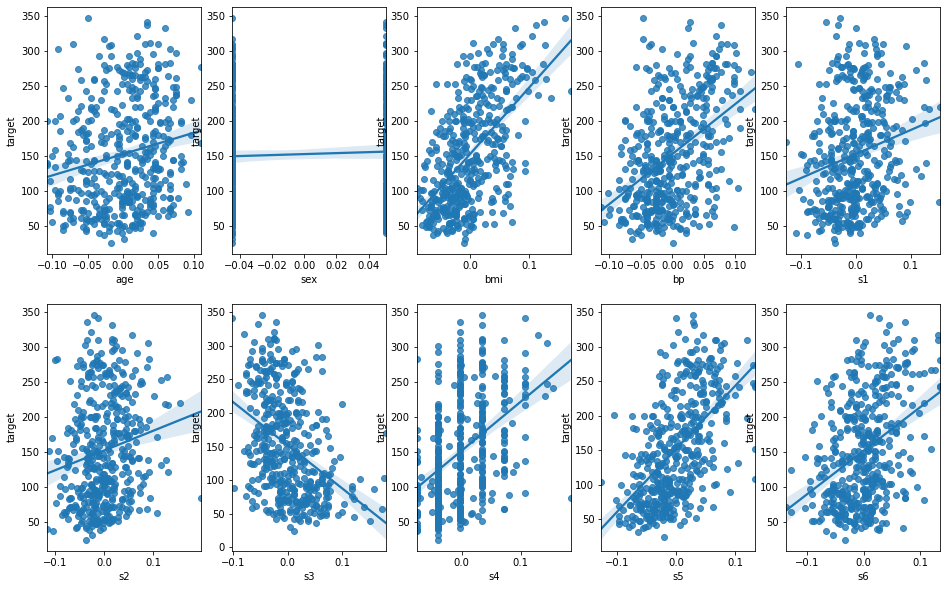

In [71]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(16,10))
for i, feature in enumerate(diabetes.feature_names):
    row, col = i//5, i%5
    sns.regplot(x=feature, y='target', data=df, ax=axs[row][col])

In [72]:
df.describe() # 대부분 y값은 오른쪽 끝에 있음, # 연속적인 값을 구하기 위해 회귀/ (0~100)까지 숫자를 

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
# 모델 적용

y = diabetes.target
X = df[feature].values.reshape(-1,1)
# X = df['target'].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

0.14629361572293453

In [75]:
y= diabetes.target

for feature in diabetes.feature_names:
    X = df[feature].values.reshape(-1,1)
    lr = LinearRegression()
    lr.fit(X,y)
    score = lr.score(X,y)
    print(f'{feature}:\t{score:.4f}')

age:	0.0353
sex:	0.0019
bmi:	0.3439
bp:	0.1949
s1:	0.0450
s2:	0.0303
s3:	0.1559
s4:	0.1853
s5:	0.3202
s6:	0.1463


In [66]:
# 다중 선형 회귀(1차식으로만) -> 예측값을 활용
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, test_size= 0.1, random_state= 2021
)


In [76]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [78]:
lr.score(X_test, y_test)

0.45584017860891035

In [79]:
lr.score(X_test, y_test)

0.45584017860891035

In [80]:
lr.coef_, lr.intercept_

(array([ -14.06014661, -246.92791992,  547.80956855,  286.58708365,
        -656.22582592,  364.21134557,   60.28474402,  182.53318837,
         702.08292875,   68.21197298]),
 151.67372554450927)

In [82]:
pred_lr = lr.predict(X_test)

In [84]:
from sklearn.metrics import mean_squared_error
mse_lr = mean_squared_error(y_test, pred_lr)
mse_lr

2370.1978745563174

In [60]:
# 다중 선형회귀는 R squared Value가 무의미
lr.score(X_test, y_test)

0.45584017860891035

In [61]:
# weight
lr.coef_

array([ -14.06014661, -246.92791992,  547.80956855,  286.58708365,
       -656.22582592,  364.21134557,   60.28474402,  182.53318837,
        702.08292875,   68.21197298])

In [62]:
# Bias
lr.intercept_

151.67372554450927

In [86]:
pred_lr = lr.predict(X_test)

In [87]:
from sklearn.metrics import mean_squared_error
mse_lr = mean_squared_error(y_test, pred_lr)
mse_lr

2370.1978745563174

In [85]:
from sklearn.svm import SVR # svm에도 regressor가 있다.
svr = SVR()
svr.fit(X_train, y_train)
pred_sv = svr.predict(X_test)
mse_sv = mean_squared_error(y_test, pred_sv)
mse_sv

3960.9366880199996

In [88]:
# RandomForestRegressor

In [89]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=2021)
rfr.fit(X_train, y_train)
pred_rf = rfr.predict(X_test)
mse_rf = mean_squared_error(y_test, pred_rf)
mse_rf

3824.664311111111

In [91]:
df = pd.DataFrame({
    'y_test': y_test, 'LR': pred_lr, 
    'SVM' : pred_sv, 'RF': pred_rf, 
})
df.head()

,y_test,LR,SVM,RF
0,155.0,156.031216,133.705341,111.79
1,167.0,185.700495,146.907788,144.81
2,185.0,162.863840,140.965960,175.52
3,109.0,162.545441,144.683128,154.34
4,65.0,78.518494,118.088552,96.48


In [92]:
# 모델 별 MSE 값
print('1. LR_MSE : {}\n2. SVM : {}\n3. RF :{}'.format(mse_lr, mse_sv, mse_rf))

1. LR_MSE : 2370.1978745563174
2. SVM : 3960.9366880199996
3. RF :3824.664311111111
